# Data exploration
---

This notebook looks into statistical properties of the raw data and the scaled data, plots distributions and correlation plots

In [1]:
# import external modules
import sys, os

ROOT_PATH = os.path.abspath(".").split("src")[0]
module_path = os.path.abspath(os.path.join(ROOT_PATH + "src/utils/"))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc 
from datetime import datetime

import functions as f
from data_preprocessor import DataPreprocessor

SEED=100; np.random.seed(SEED);

In [2]:
c, p = f.color_palette()
sns.set(context='paper', style='whitegrid', palette=np.array(p))
plt.style.use('file://' + ROOT_PATH + "src/utils/plotparams.rc")

In [17]:
train_scaled, valid_scaled, test_scaled = f.load_data()

dp = DataPreprocessor()
train_raw = dp.read_data(train_scaled.columns, train_scaled.index[0], train_scaled.index[-1])
valid_raw = dp.read_data(train_scaled.columns, valid_scaled.index[0], valid_scaled.index[-1])
test_raw = dp.read_data(train_scaled.columns, test_scaled.index[0], test_scaled.index[-1])
all_raw = dp.read_data(train_scaled.columns, train_scaled.index[0], test_scaled.index[-1])

def shorten_tagname(tag):
    nname = tag.split("VAL_23")[1][1:]
    nname = nname.split(".Value")[0]
    nname = nname.split(":VALUE")[0]
    nname = nname.split(":X")[0]
    
    if "KA_9101" in nname:
        nname = nname.split(":Z.X")[0]
    return nname

short_tagnames = [shorten_tagname(tag) for tag in train_scaled.columns]

for df in [train_scaled, valid_scaled, test_scaled, train_raw, valid_raw, test_raw, all_raw]:
    df.columns=short_tagnames

print(train_scaled.columns)

Index(['FT-92537-01', 'TT-92539', 'PT-92539', 'ZT_92543:Z.X', 'PT-92523',
       'PDT-92534', 'TT_92532:Z.X', 'TIC-92504:Z.X', 'KA_9101_M01_62C'],
      dtype='object')


## [1] Summary statistics

In [109]:
def get_summary(df, print_tex=False):
    df_sorted = df.sort_values(by=("Test", "Avg")).apply(pd.to_numeric)
    if print_tex: print(latexify(df_sorted))
    return df_sorted

### Raw data

In [18]:
f.get_stats_properties(train_raw).round(2)

Mean         Median          Std            Max  \
FT-92537-01      161807.371388  161673.280874  3376.280862  215234.766484   
TT-92539            124.490432     124.511517     0.974911     128.794898   
PT-92539             12.697328      12.699908     0.247472      14.287270   
ZT_92543:Z.X         38.421970      38.696092     3.532303      60.949738   
PT-92523              2.896987       2.887242     0.077879       3.844991   
PDT-92534           103.651412     103.455746     4.057301     149.123435   
TT_92532:Z.X         32.759719      32.761423     0.997312      37.290539   
TIC-92504:Z.X        39.665097      39.784640     1.045558      44.329240   
KA_9101_M01_62C    9038.142279    9038.946390   161.977694   11128.299378   

                           Min        1st Qu.        3rd Qu.    NAs  
FT-92537-01      147442.173910  159552.453314  163912.959314   76.0  
TT-92539            119.512739     123.918816     125.122708  785.0  
PT-92539             11.752882      12.515568      12.875619   79.0  
ZT_92543:Z.X         20.371551      36.165987      40.558003  668.0  
PT-92523              2.648369       2.840570       2.943916   72.0  
PDT-92534            85.976939     100.895430     106.181824   40.0  
TT_92532:Z.X         27.942626      32.124763      33.464158  683.0  
TIC-92504:Z.X        35.489975      39.144742      40.214948  105.0  
KA_9101_M01_62C    8230.075978    8930.616889    9145.951648   84.0

In [19]:
f.get_stats_properties(valid_raw).round(2)

Mean         Median          Std            Max  \
FT-92537-01      160973.188807  160745.474466  3675.548041  224396.129479   
TT-92539            125.802189     125.727549     0.876397     129.594619   
PT-92539             12.697628      12.700548     0.253655      14.414898   
ZT_92543:Z.X         34.055548      33.922492     3.304140      54.675851   
PT-92523              2.904181       2.896967     0.085090       4.021907   
PDT-92534           102.702463     102.378533     4.137866     157.089903   
TT_92532:Z.X         34.111969      34.038298     0.757619      39.145702   
TIC-92504:Z.X        39.586078      39.336508     1.566153      45.121540   
KA_9101_M01_62C    9012.349566    9008.702174   166.602997   11349.886165   

                           Min        1st Qu.        3rd Qu.    NAs  
FT-92537-01      147810.863893  158539.700228  163118.997121    0.0  
TT-92539            120.280666     125.220002     126.355225  213.0  
PT-92539             11.815620      12.512048      12.878526    0.0  
ZT_92543:Z.X         18.708544      31.844580      36.124407  338.0  
PT-92523              2.605437       2.845003       2.956645    0.0  
PDT-92534            87.757065      99.912625     105.103566    0.0  
TT_92532:Z.X         29.899634      33.571126      34.604667  163.0  
TIC-92504:Z.X        35.452167      38.452647      40.649621    0.0  
KA_9101_M01_62C    8297.996216    8902.651165    9118.154035    0.0

In [25]:
f.get_stats_properties(test_raw).round(2)

Mean     Median      Std        Max        Min  \
FT-92537-01      160690.71  160551.68  3266.53  206544.70  148411.07   
TT-92539            126.12     126.15     0.86     130.57     122.31   
PT-92539             12.70      12.71     0.23      14.66      11.80   
ZT_92543:Z.X         32.59      32.48     2.97      47.75      16.51   
PT-92523              2.90       2.90     0.07       3.94       2.64   
PDT-92534           102.30     102.05     3.88     137.00      88.69   
TT_92532:Z.X         34.44      34.44     0.72      40.00      31.81   
TIC-92504:Z.X        39.69      39.75     1.81      45.09      35.07   
KA_9101_M01_62C    9004.86    9005.42   160.56   10645.73    8328.70   

                   1st Qu.    3rd Qu.    NAs  
FT-92537-01      158475.79  162762.55    1.0  
TT-92539            125.56     126.74  288.0  
PT-92539             12.53      12.87    1.0  
ZT_92543:Z.X         30.59      34.46   58.0  
PT-92523              2.85       2.95    2.0  
PDT-92534            99.51     104.85    1.0  
TT_92532:Z.X         33.96      34.95  164.0  
TIC-92504:Z.X        38.32      40.99    4.0  
KA_9101_M01_62C    8896.75    9112.51    2.0

### Scaled data

In [27]:
f.get_stats_properties(train_scaled).round(4)

Mean  Median  Std      Max     Min  1st Qu.  3rd Qu.  NAs
FT-92537-01       0.0 -0.0397  1.0  15.8227 -4.2540  -0.6679   0.6237  0.0
TT-92539          0.0  0.0216  1.0   4.4056 -5.0984  -0.5862   0.6486  0.0
PT-92539         -0.0  0.0105  1.0   6.4247 -3.8162  -0.7346   0.7205  0.0
ZT_92543:Z.X      0.0  0.0795  1.0   6.3860 -5.1196  -0.6381   0.6054  0.0
PT-92523          0.0 -0.1253  1.0  12.1704 -3.1916  -0.7247   0.6026  0.0
PDT-92534         0.0 -0.0483  1.0  11.2100 -4.3574  -0.6794   0.6239  0.0
TT_92532:Z.X     -0.0  0.0033  1.0   4.5316 -4.8158  -0.6348   0.7067  0.0
TIC-92504:Z.X     0.0  0.1144  1.0   4.4588 -7.2597  -0.4978   0.5259  0.0
KA_9101_M01_62C  -0.0  0.0050  1.0  12.9036 -4.9882  -0.6638   0.6656  0.0

In [28]:
f.get_stats_properties(valid_scaled).round(4)

Mean  Median     Std      Max     Min  1st Qu.  3rd Qu.  \
FT-92537-01     -0.2468 -0.3144  1.0885  18.5359 -4.1448  -0.9675   0.3885   
TT-92539         1.3419  1.2660  0.8957   5.2245 -4.3122   0.7471   1.9054   
PT-92539         0.0013  0.0133  1.0249   6.9404 -3.5627  -0.7485   0.7322   
ZT_92543:Z.X    -1.2397 -1.2766  0.9330   4.6071 -5.5911  -1.8630  -0.6551   
PT-92523         0.0925 -0.0001  1.0924  14.4416 -3.7428  -0.6672   0.7662   
PDT-92534       -0.2342 -0.3140  1.0201  13.1740 -3.9186  -0.9220   0.3578   
TT_92532:Z.X     1.3524  1.2789  0.7574   6.3866 -2.8589   0.8106   1.8462   
TIC-92504:Z.X   -0.0754 -0.3139  1.4971   5.2161 -4.0270  -1.1588   0.9413   
KA_9101_M01_62C -0.1590 -0.1816  1.0285  14.2716 -4.5689  -0.8362   0.4941   

                 NAs  
FT-92537-01      0.0  
TT-92539         0.0  
PT-92539         0.0  
ZT_92543:Z.X     0.0  
PT-92523         0.0  
PDT-92534        0.0  
TT_92532:Z.X     0.0  
TIC-92504:Z.X    0.0  
KA_9101_M01_62C  0.0

In [29]:
f.get_stats_properties(test_scaled).round(4)

Mean  Median     Std      Max     Min  1st Qu.  3rd Qu.  \
FT-92537-01     -0.3303 -0.3715  0.9673  13.2492 -3.9670  -0.9862   0.2831   
TT-92539         1.6710  1.6998  0.8779   6.2239 -2.2296   1.0965   2.3005   
PT-92539         0.0153  0.0587  0.9300   7.9176 -3.6309  -0.6561   0.6983   
ZT_92543:Z.X    -1.6568 -1.6882  0.8411   2.6430 -6.2142  -2.2229  -1.1286   
PT-92523         0.0644 -0.0025  0.9473  13.4408 -3.2625  -0.6050   0.6839   
PDT-92534       -0.3323 -0.3947  0.9556   8.2213 -3.6894  -1.0200   0.2957   
TT_92532:Z.X     1.6824  1.6839  0.7218   7.2391 -0.9495   1.2004   2.1934   
TIC-92504:Z.X    0.0198  0.0781  1.7265   5.1895 -4.3943  -1.2826   1.2698   
KA_9101_M01_62C -0.2051 -0.2018  0.9911   9.9246 -4.3793  -0.8723   0.4593   

                 NAs  
FT-92537-01      0.0  
TT-92539         0.0  
PT-92539         0.0  
ZT_92543:Z.X     0.0  
PT-92523         0.0  
PDT-92534        0.0  
TT_92532:Z.X     0.0  
TIC-92504:Z.X    0.0  
KA_9101_M01_62C  0.0

## [2] Distribution plots

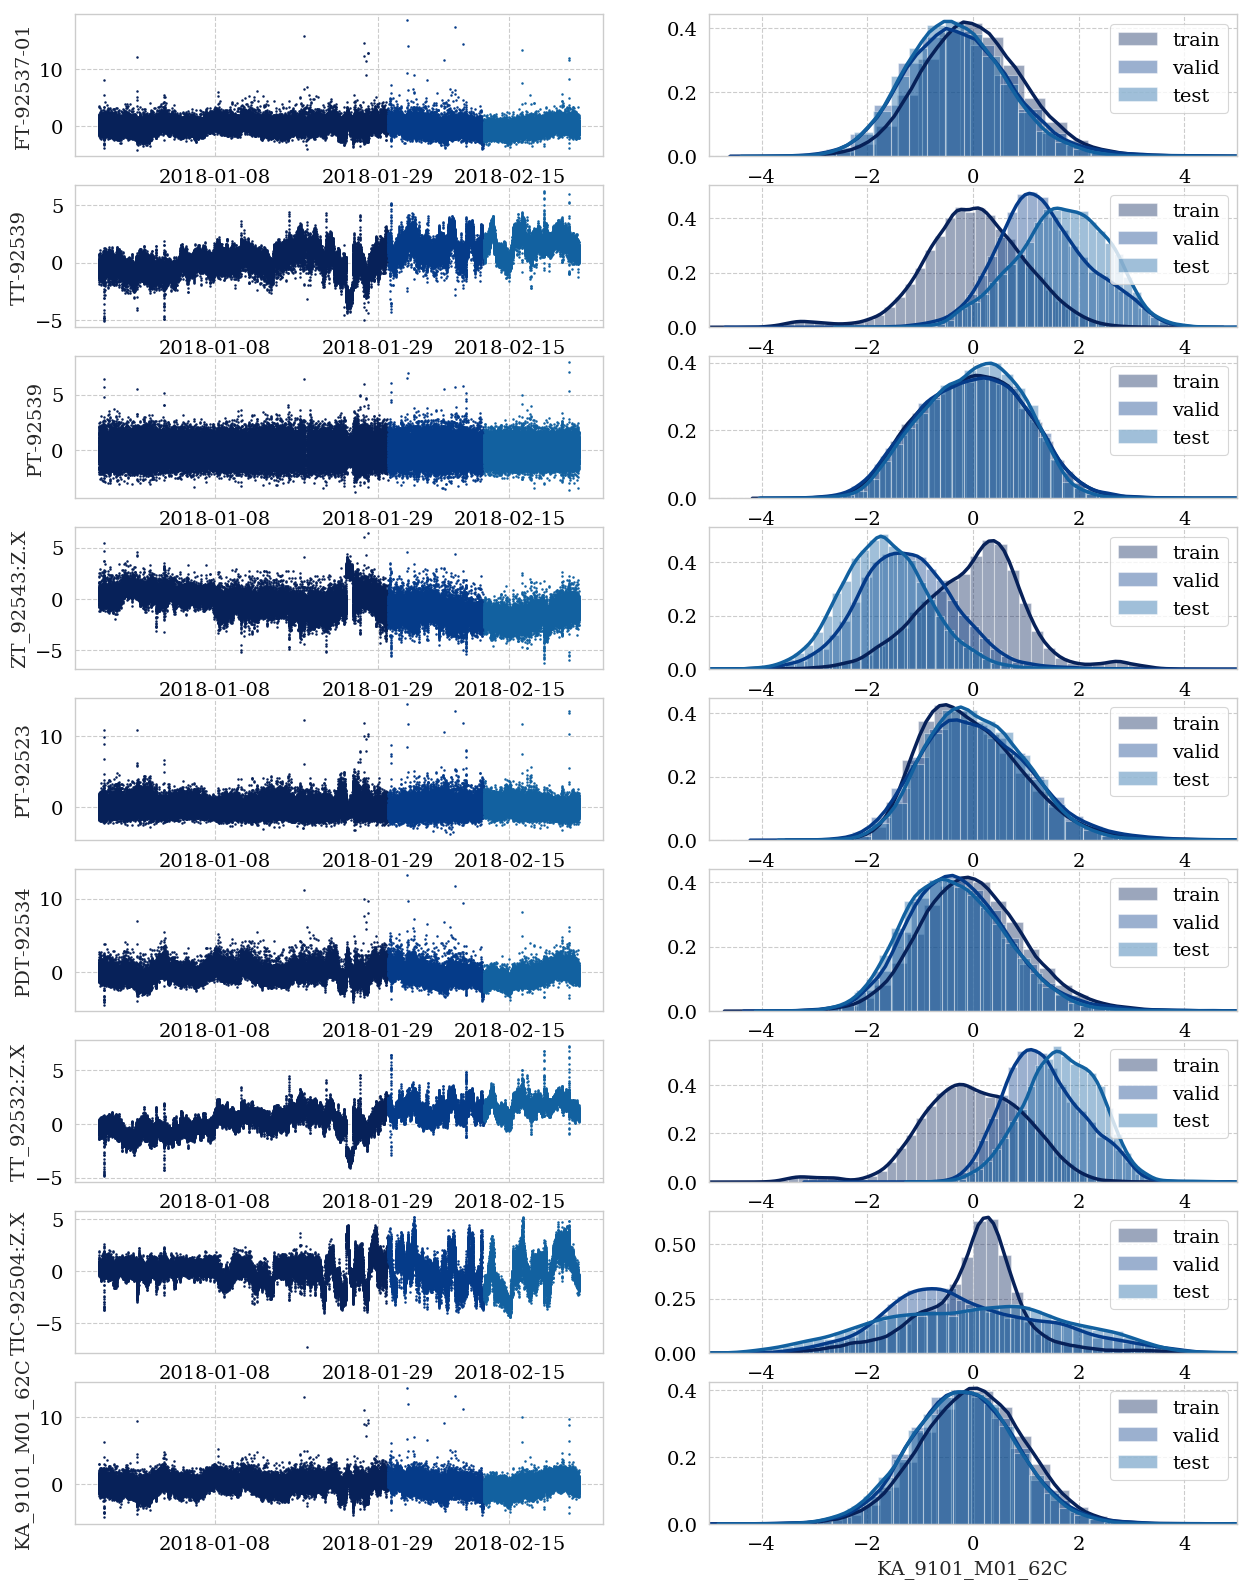

In [32]:
fig, axs = plt.subplots(nrows=train_scaled.shape[-1], ncols=2, figsize=(15,20), dpi=100)

for k in range(train_scaled.shape[-1]):
    ax1, ax2 = axs[k, 0], axs[k, 1]
    
    ax1.plot(train_scaled.iloc[:,k], label="train",
             marker="o", ms=.8, lw=0)
    ax1.plot(valid_scaled.iloc[:,k], label="valid",
             marker="o", ms=.8, lw=0)
    ax1.plot(test_scaled.iloc[:,k], label="test",
             marker="o", ms=.8, lw=0)
    
    ax1.set_xticks(ax1.get_xticks()[3::3])
    ax1.set_ylabel(train_scaled.columns[k])
    
    sns.distplot(train_scaled.iloc[:,k], ax=ax2, label="train", kde=True, kde_kws={"lw":2.5})
    sns.distplot(valid_scaled.iloc[:,k], ax=ax2, label="valid", kde=True, kde_kws={"lw":2.5})
    sns.distplot(test_scaled.iloc[:,k], ax=ax2, label="test", kde=True, kde_kws={"lw":2.5})
    
    ax2.set_xlim((-5,5))
    ax2.legend(loc="upper right")

fig.show()

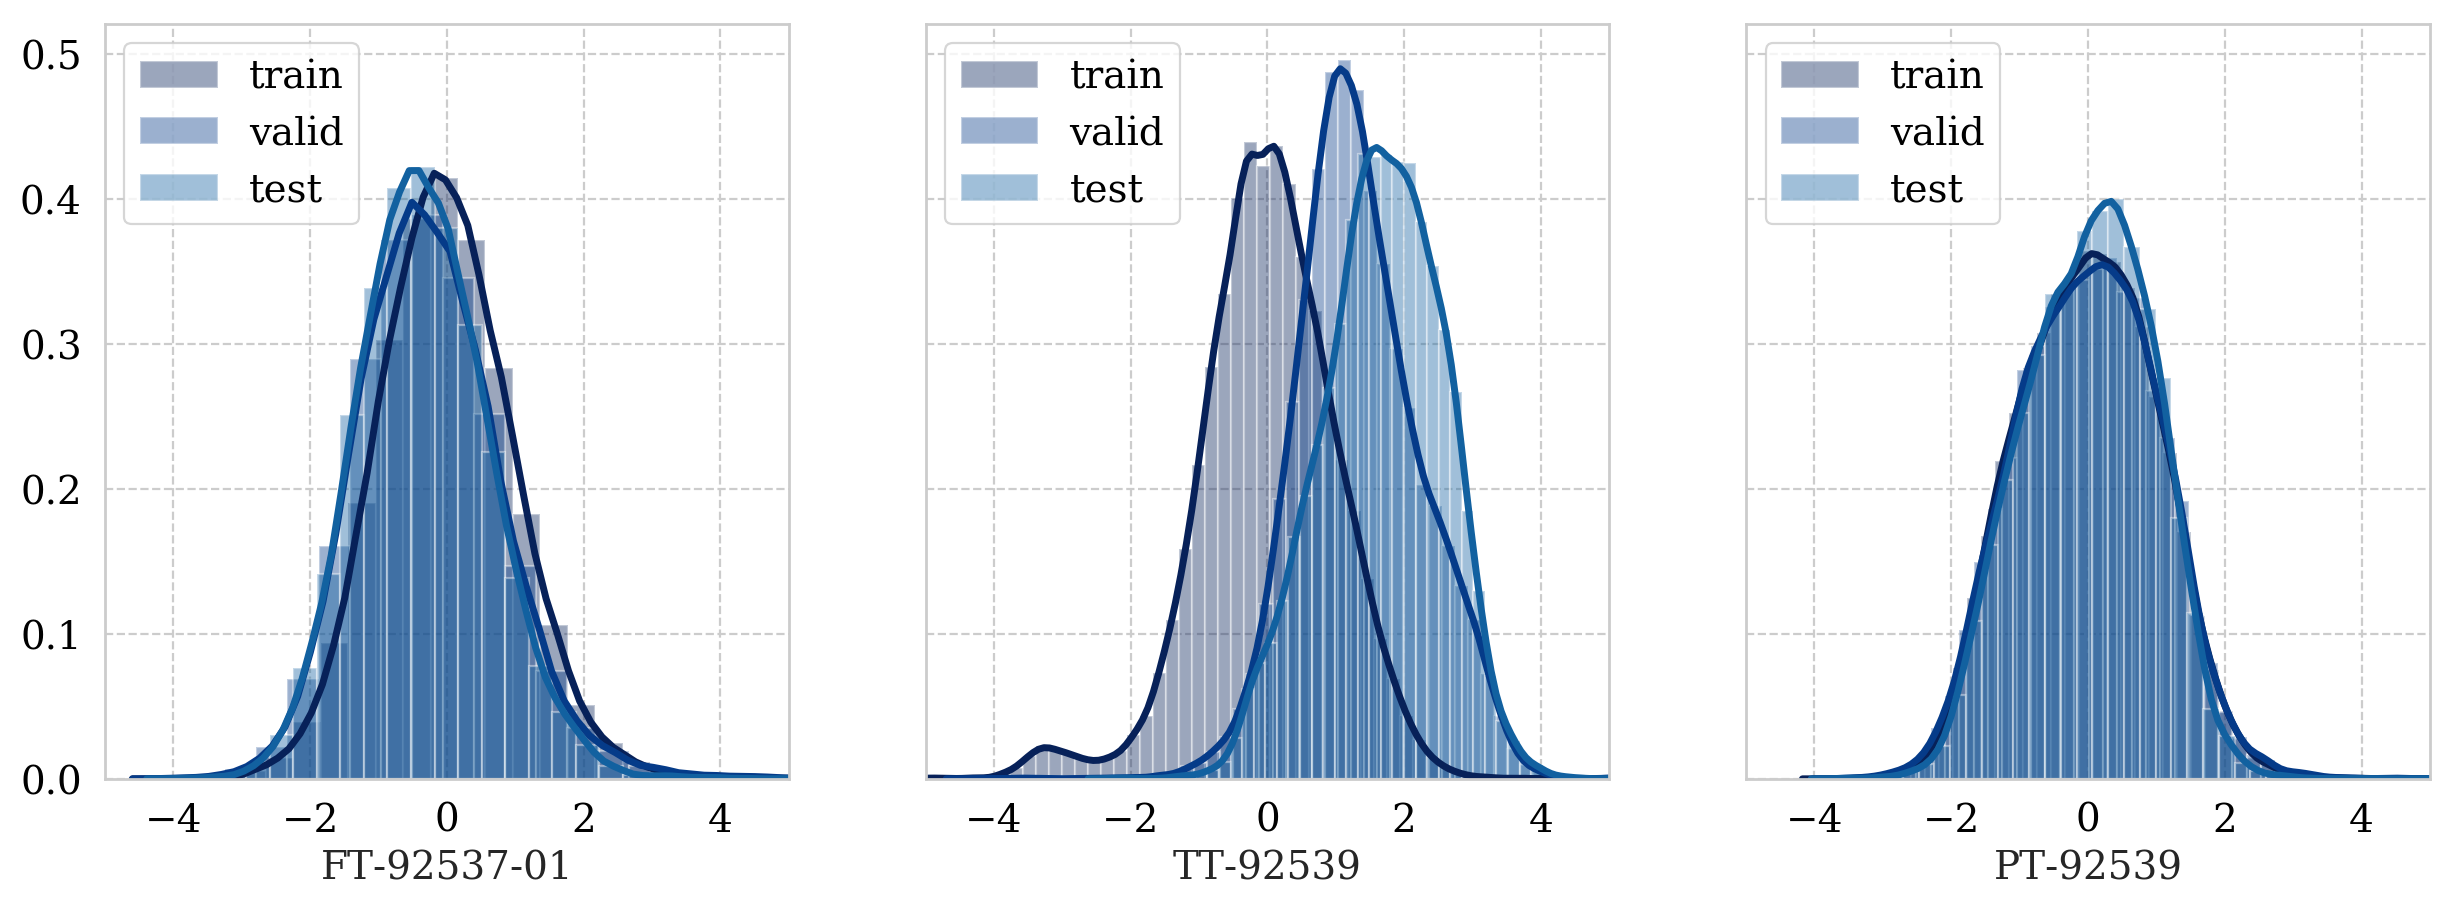

In [34]:
# distribution of targets
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5), sharex=True, sharey=True)

for k in range(3):
    ax = axs[k]
    
    sns.distplot(train_scaled.iloc[:,k], ax=ax, kde=True, kde_kws={"lw":2.5}, label="train")
    sns.distplot(valid_scaled.iloc[:,k], ax=ax, kde=True, kde_kws={"lw":2.5}, label="valid")
    sns.distplot(test_scaled.iloc[:,k], ax=ax, kde=True, kde_kws={"lw":2.5}, label="test")
    
    ax.set_xlim((-5,5))
    ax.legend(frameon=True, loc='upper left')
    
fig.show()

<Figure size 2400x800 with 0 Axes>

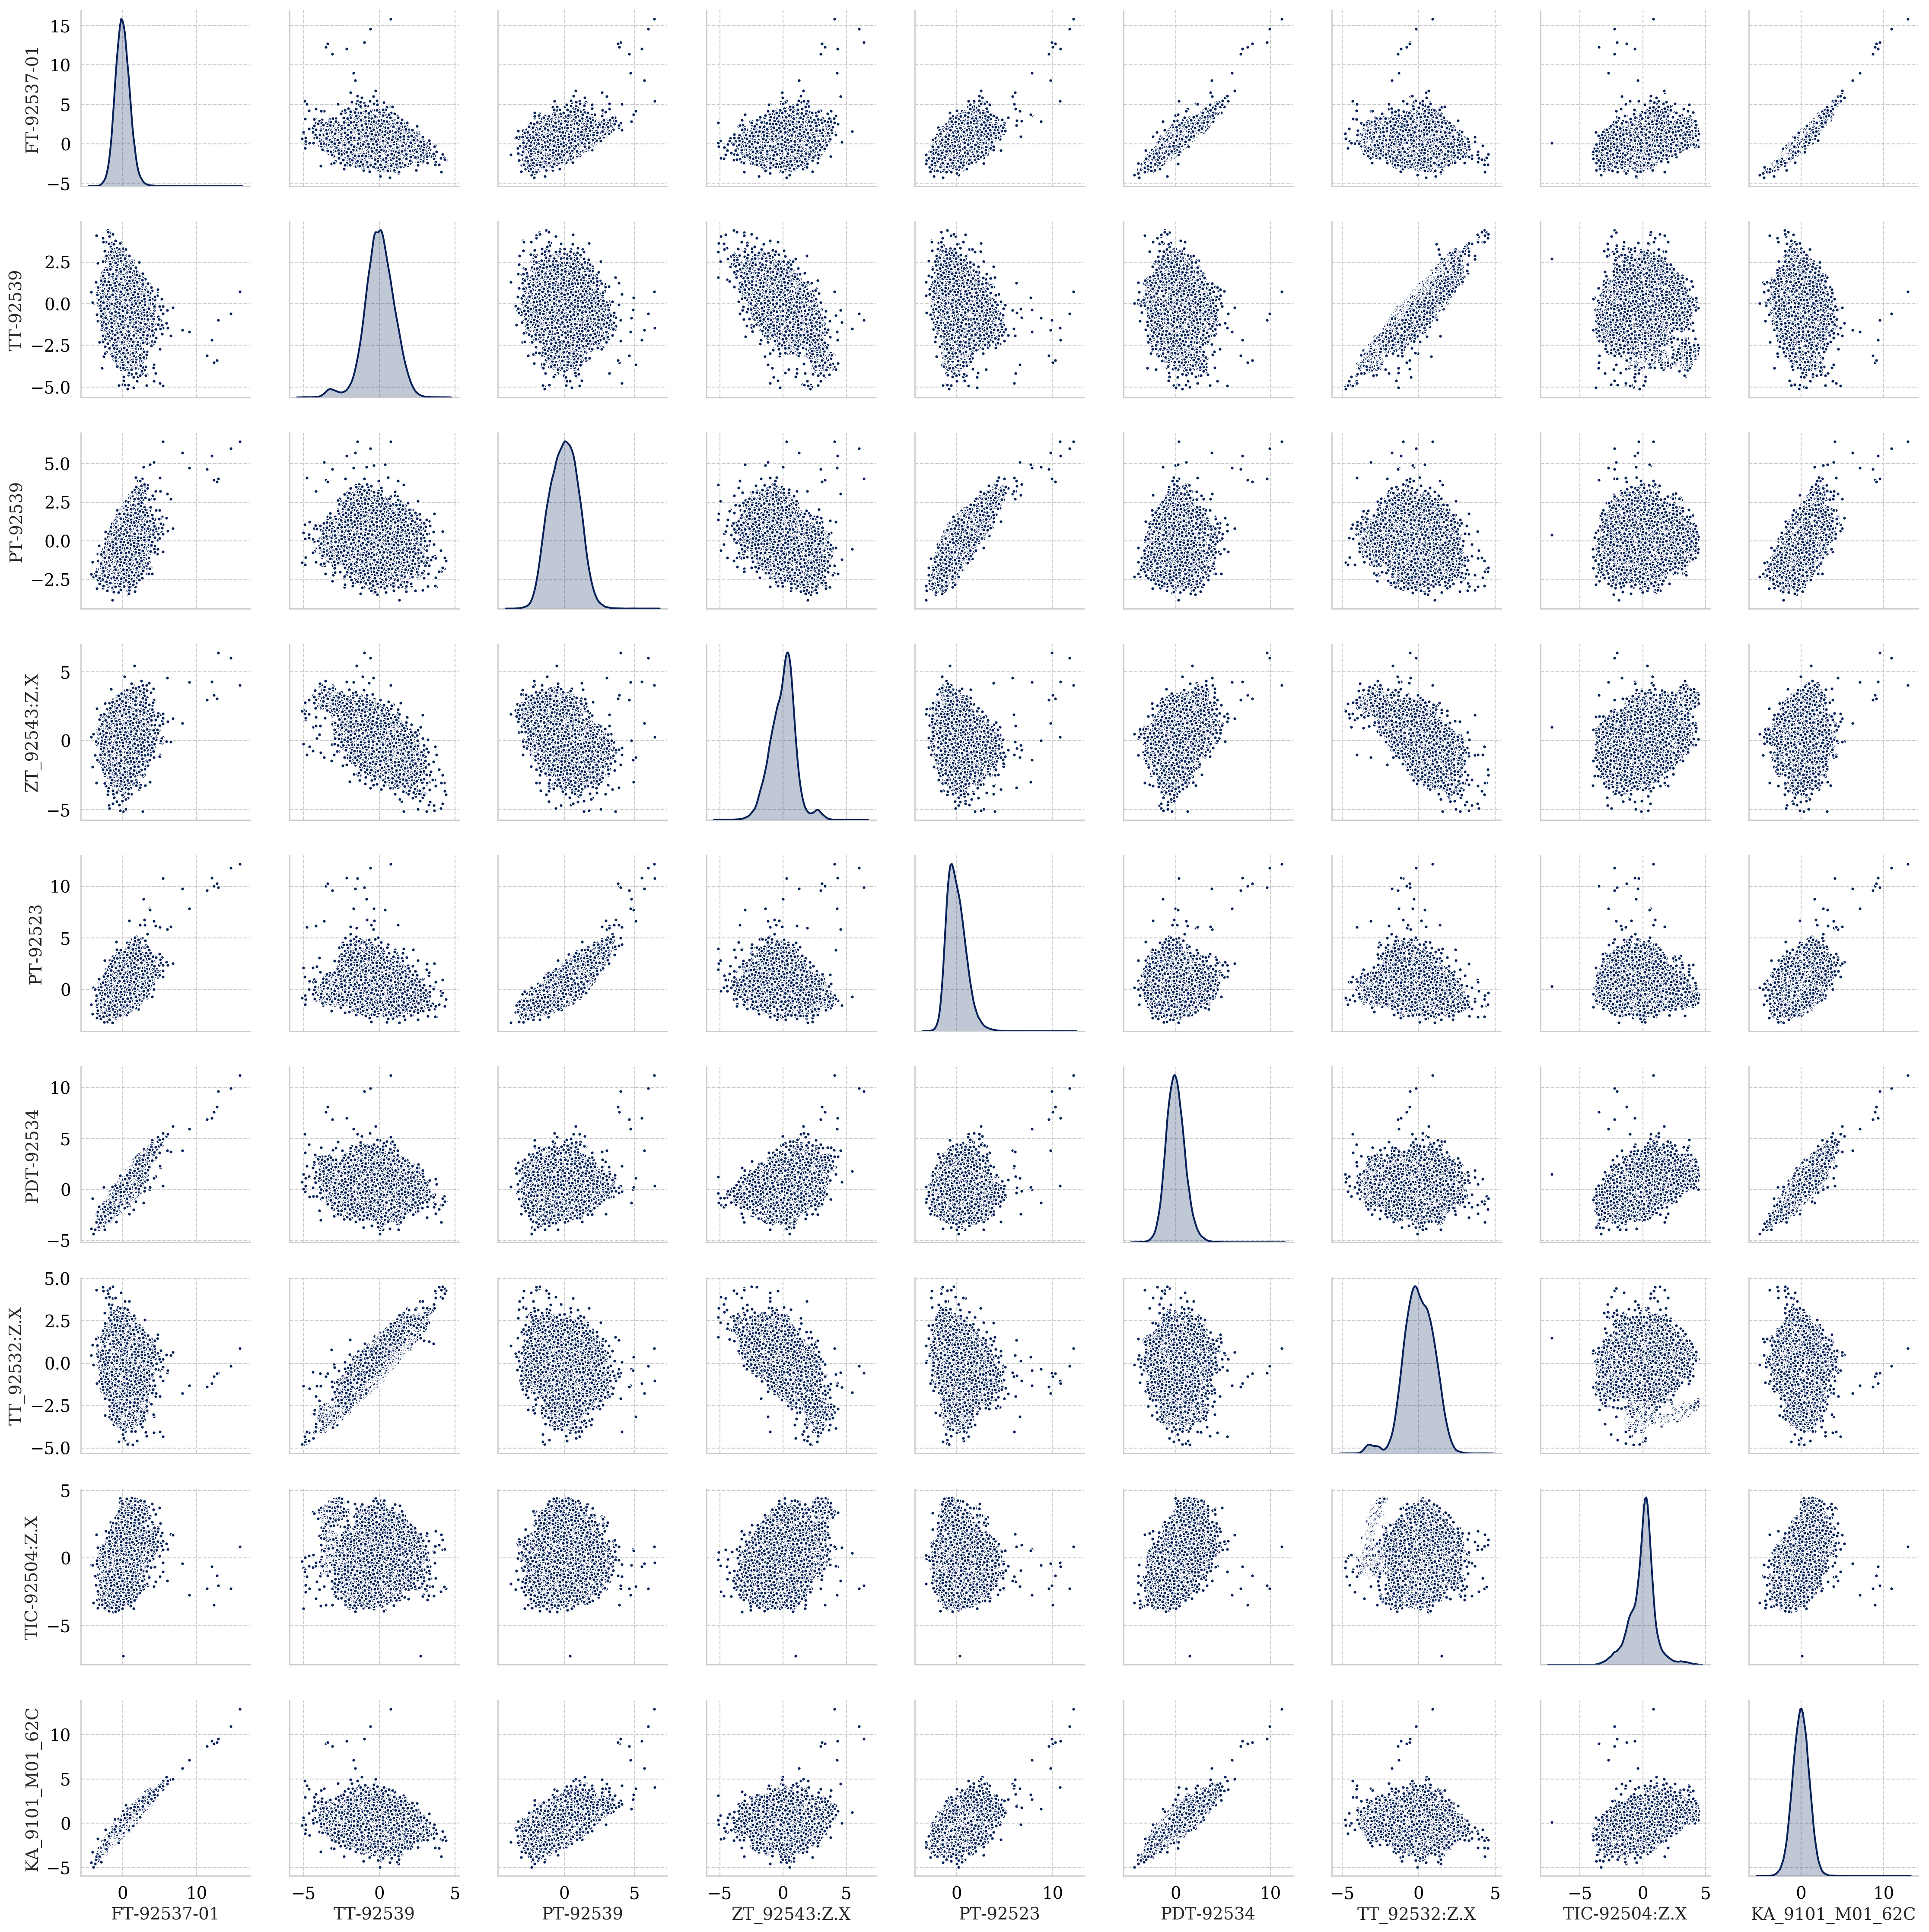

In [35]:
plt.figure()
sns.pairplot(train_scaled, diag_kind="kde")
plt.show()

## [3] Correlation analysis

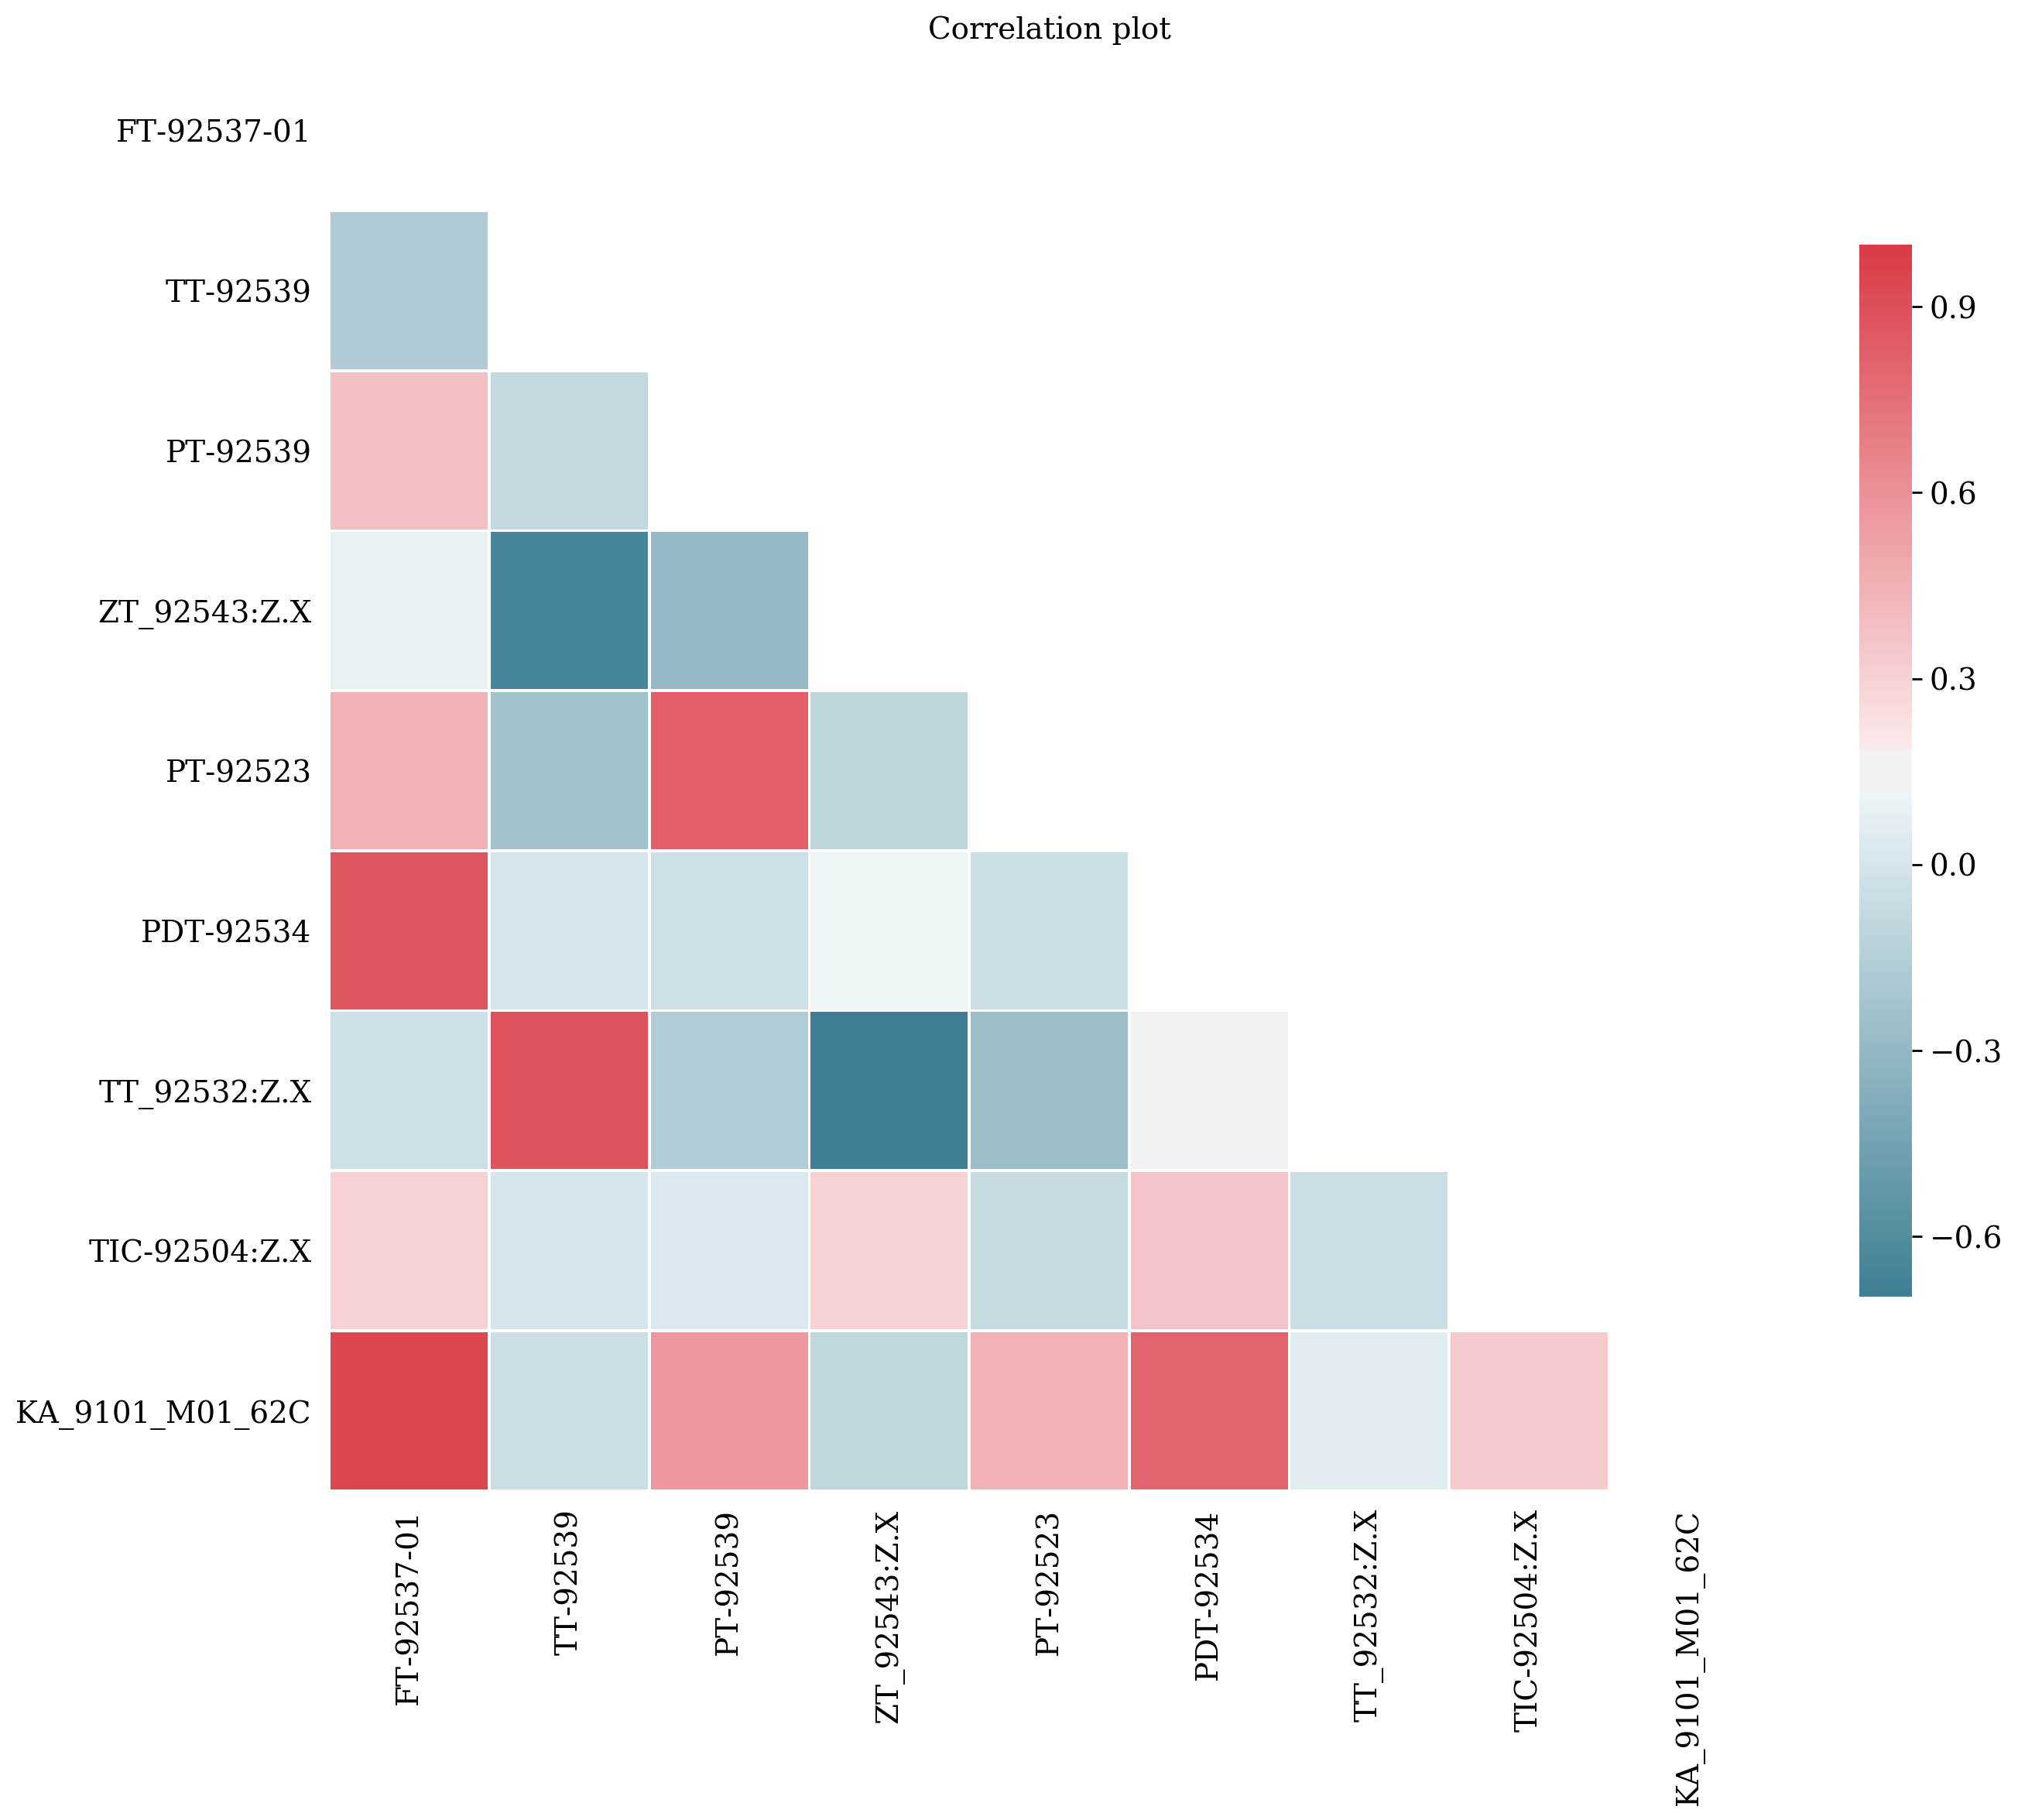

In [39]:
def plot_correlation(df, title="Correlation plot"):
    corr = df.corr()

    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(15, 15))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap,
                square=True, linewidths=1, cbar_kws={"shrink": .6})

    ax.set_title(title)
    
    f.show()

plot_correlation(train_scaled)

#### Autocorrelation

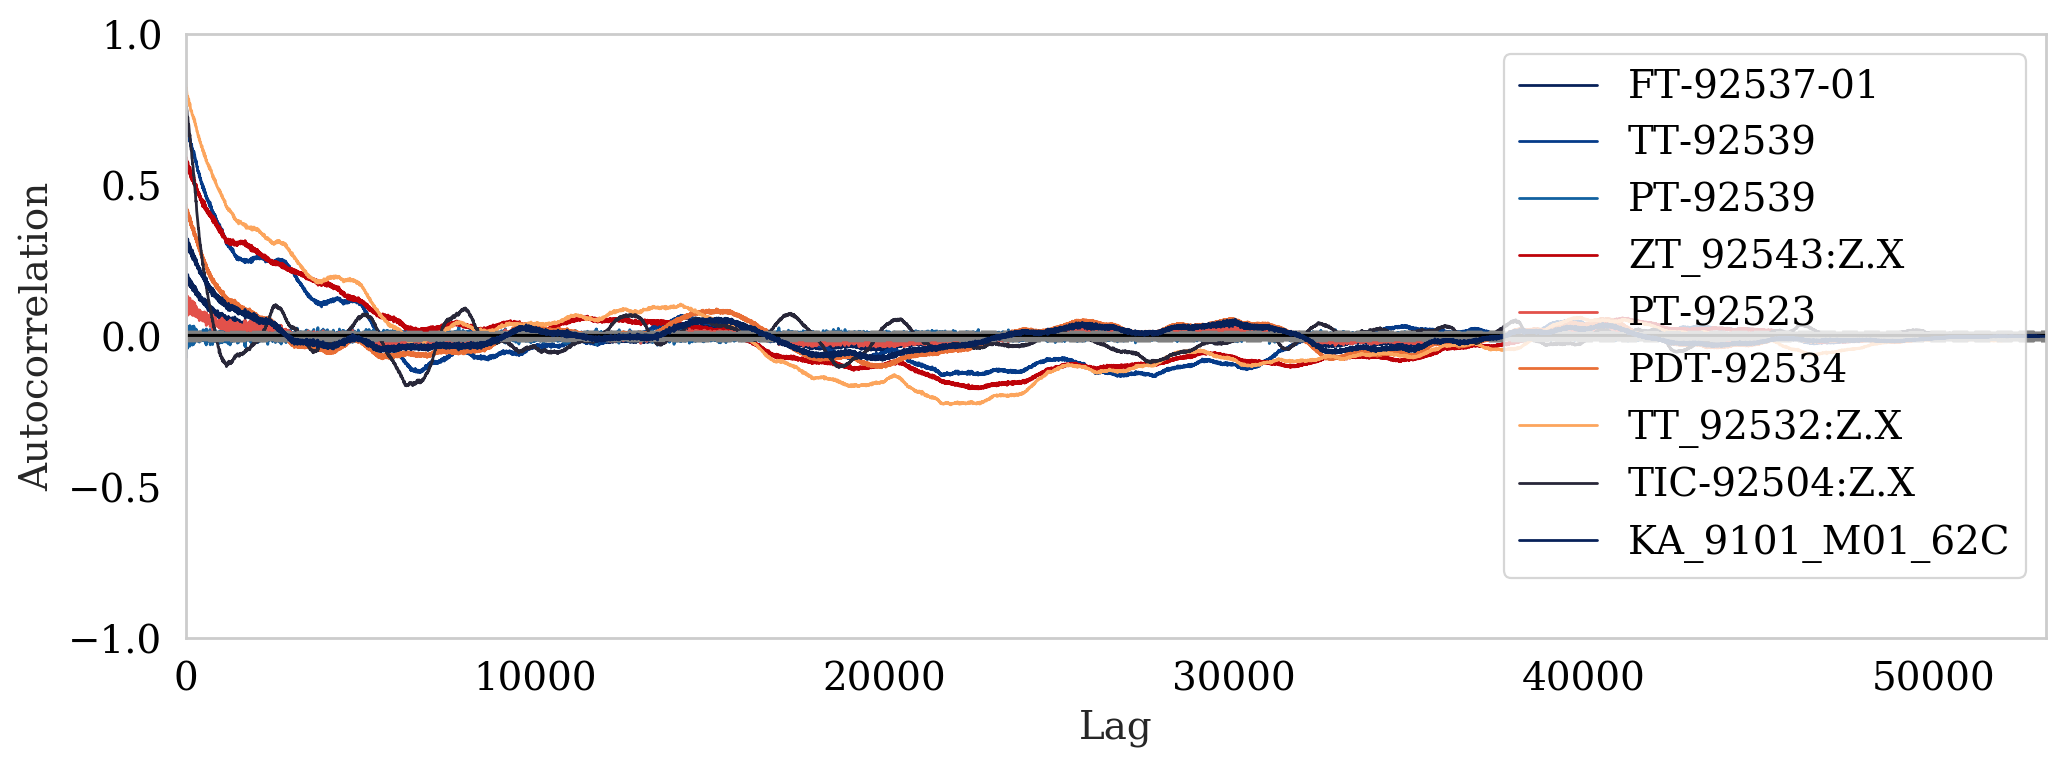

In [43]:
for t in range(len(train_scaled.columns)):
    pd.plotting.autocorrelation_plot(train_scaled.iloc[:,t], label=train_scaled.columns[t], lw=1)